In [1]:
# Set your name
Name = 'Mohammad Javad'
Last_Name = 'Maheronnaghsh'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat


NUM_PIXELS = 28*28

In [3]:
def load_model(model_file):
    '''
    Loads a default Bayesian network with latent variables (in this case, a
    variational autoencoder)
    '''

    with open(model_file, 'rb') as infile:
        cpts = pkl.load(infile, encoding='bytes')

    model = {}
    model['prior_z1'] = cpts[0]
    model['prior_z2'] = cpts[1]
    model['cond_likelihood'] = cpts[2]

    return model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
global disc_z1, disc_z2
n_disc_z = 25
disc_z1 = np.linspace(-3, 3, n_disc_z)
disc_z2 = np.linspace(-3, 3, n_disc_z)

global bayes_net
# !ls "/content/drive/My Drive"
bayes_net = load_model('/content/drive/My Drive/trained_mnist_model')
# bayes_net = load_model('./trained_mnist_model')

In [6]:
def get_p_z1(z1_val):
    '''
    Helper. Computes the prior probability for variable z1 to take value z1_val.
    P(Z1=z1_val)
    '''

    return bayes_net['prior_z1'][z1_val]


def get_p_z2(z2_val):
    '''
    Helper. Computes the prior probability for variable z2 to take value z2_val.
    P(Z2=z2_val)
    '''

    return bayes_net['prior_z2'][z2_val]

In [7]:
def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
    '''
    Helper. Computes the conditional probability that variable xk assumes value 1
    given that z1 assumes value z1_val and z2 assumes value z2_val
    P(Xk = 1 | Z1=z1_val , Z2=z2_val)
    '''

    return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]


def get_p_x_cond_z1_z2(z1_val, z2_val):
    '''
    Computes the conditional probability of the entire vector x for x = 1,
    given that z1 assumes value z1_val and z2 assumes value z2_val
    '''
    pk = np.zeros(NUM_PIXELS)
    for i in range(NUM_PIXELS):
        pk[i] = get_p_xk_cond_z1_z2(z1_val, z2_val, i+1)
    return pk

In [ ]:
# First Part of Question
'''
In this part we are going to get
5 samples of joint probability distribution
p(Z_1, Z_2, x_1, ... , x_784)
and then plot them together
'''

In [ ]:
'''
goal: 
  compute 5 samples of (z_1, z_2, x_1, ... , x_784)
solution: 
  First
  we know z_i = {-3, -2.75, ... , 2.75, 3}
  so we can choose a random of these 25 numbers
  for each z_i
  Second
  we know x_i is a binary value that can be
  1 or 0, so we can pick randomely 0 or 1
  for each x_i
'''

In [19]:
def calculate_z_randomely():
  '''
  this function creates 2 random numbers for z_i
  and NUM_PIXEL numbers for x_i
  I got help from this link:
  https://www.programiz.com/python-programming/examples/random-number#:~:text=
  To%20generate%20random%20number%20in,is%20defined%20in%20random%20module.
  to create random numbers
  but after that i understood my problem and used this link:
  https://pynative.com/python-weighted-random-choices-with-probability/
  to use weighted probs
  '''
  import random
  z_1 = disc_z1[random.choices([z for z in range(n_disc_z)], [get_p_z1(z_value) for z_value in disc_z1], k=1)[0]]
  z_2 = disc_z2[random.choices([z for z in range(n_disc_z)], [get_p_z2(z_value) for z_value in disc_z2], k=1)[0]]
  # random_index_of_z1 = random.randint(0, n_disc_z - 1)
  # random_index_of_z2 = random.randint(0, n_disc_z - 1)
  # z_1 = disc_z1[random_index_of_z1]
  # z_2 = disc_z2[random_index_of_z2]
  return [z_1, z_2]


def calculate_x(z_1, z_2):
  '''
  this function calculates x_i that 0 <= i <= NUM_PIXELS
  note: x_i is binary (it can be 0 or 1)
  '''
  # import random
  # temp_list = np.zeros(NUM_PIXELS)
  # for x_i in range(NUM_PIXELS):
  #   temp_list[x_i] = random.randint(0, 1)
  # return temp_list
  return get_p_x_cond_z1_z2(z_1, z_2).reshape(784, )

def plot_the_answer(data, index):
  '''
  i got help from this link:
  https://www.geeksforgeeks.org/create-2d-pixel-plot-in-python/
  to plot data
  '''
  pixel_plot = plt.figure()
  pixel_plot.add_axes()
  plt.title("Sample " + str(index))
  pixel_plot = plt.imshow(
    data, cmap='binary', interpolation='nearest')
    
  plt.colorbar(pixel_plot)
  plt.show(pixel_plot)

def calculate_first_part_of_Q2(number_of_samples_to_create):
  '''
  this function creates n number of samples
  for (z_1, z_2, x_1, ... , x_n)
  such that n = number_of_samples_to_create
  '''
  import math
  answer_array = np.zeros((number_of_samples_to_create, NUM_PIXELS))
  for sample_number in range(number_of_samples_to_create):
    z_1, z_2 = calculate_z_randomely()
    answer_array[sample_number] = calculate_x(z_1, z_2)
    print("Sample " + str(sample_number + 1))
    print(answer_array[sample_number].reshape(28, 28))
    plot_the_answer(answer_array[sample_number].reshape((int(math.sqrt(NUM_PIXELS)), int(math.sqrt(NUM_PIXELS)))), sample_number + 1)
    print("\n\n\n")

    

Sample 1
[[1.74159786e-13 7.99898952e-15 3.50392560e-14 2.29636861e-12
  5.70513917e-15 3.88595575e-14 8.88296581e-15 1.70540245e-13
  3.67175691e-12 1.51256381e-13 6.54935429e-14 2.06028575e-12
  3.69717142e-14 1.16290360e-13 9.70357995e-12 4.19159634e-13
  9.93866786e-14 3.79919918e-13 3.61967970e-13 1.20354562e-12
  1.20034462e-13 1.60035559e-12 6.24009395e-12 1.40314951e-13
  3.85666759e-12 2.61931454e-13 2.17610574e-14 1.71027048e-15]
 [6.29822105e-15 2.29275664e-13 5.70549554e-12 3.69894610e-12
  2.32674909e-13 1.54835332e-13 2.38753787e-14 4.63343036e-17
  1.11413722e-18 8.97533118e-17 1.40248245e-18 8.37078510e-16
  1.02679409e-19 3.80005905e-18 1.85676178e-14 6.48947519e-12
  2.59908185e-15 1.94493842e-14 8.34752493e-12 5.22418109e-10
  6.47992979e-11 4.17239548e-10 2.12819251e-09 2.18863729e-12
  7.06989331e-14 1.09685069e-12 1.40543434e-13 6.08930181e-12]
 [7.95325069e-13 6.41894239e-14 3.21330582e-13 4.97067990e-13
  4.27567451e-15 6.00039549e-13 6.67603180e-14 9.52036720e-

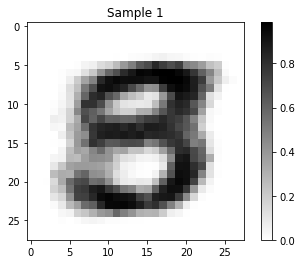





Sample 2
[[1.03339537e-12 3.40913018e-12 1.67339742e-12 1.15157005e-12
  2.19761817e-12 1.34555930e-12 2.25478945e-12 3.02169357e-12
  4.14996162e-12 4.94457285e-13 2.85406898e-12 3.60767492e-12
  3.98486962e-13 3.84908598e-11 7.93330610e-11 2.11458195e-12
  2.02916828e-12 4.88993178e-13 4.47124298e-13 1.42943925e-12
  1.36499026e-12 1.59417434e-12 7.92836716e-13 1.35245493e-12
  2.36176898e-12 1.18028937e-12 3.90645545e-12 8.91602384e-13]
 [1.37557272e-12 1.69674377e-12 8.59892398e-13 2.05619115e-12
  2.05526980e-12 1.42045132e-12 2.74689995e-08 4.01803355e-08
  8.29720204e-09 1.10085974e-09 1.35681395e-08 4.00877798e-06
  3.40757515e-06 1.73935518e-06 1.56972685e-10 6.66042084e-08
  6.79957884e-05 1.83040959e-06 2.35807511e-06 2.80511745e-06
  5.26503925e-07 4.72623952e-07 7.33357641e-09 1.95939489e-12
  9.90674903e-12 2.24911105e-12 8.48678929e-13 2.94597029e-12]
 [2.23344802e-12 2.45961996e-12 2.88772847e-12 1.73552687e-12
  3.75409259e-09 2.93819702e-09 1.13540075e-07 1.030688

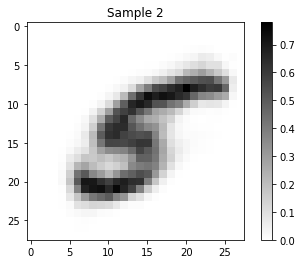





Sample 3
[[2.06496070e-11 5.14519642e-11 2.22847886e-11 1.32834247e-11
  1.81208607e-11 1.30640455e-11 3.02276711e-11 5.75679886e-11
  1.81737854e-11 7.51675978e-12 3.50831100e-11 4.09301100e-11
  9.36597154e-12 1.16699661e-09 1.00660946e-08 1.44716452e-11
  2.25009057e-11 3.81026070e-12 5.63788512e-12 4.72424495e-11
  1.79479105e-11 2.05239940e-11 2.42054172e-11 1.17646014e-11
  3.08822933e-11 1.43941248e-11 2.06768786e-11 1.12049614e-11]
 [2.42909807e-11 1.17154056e-11 9.12661266e-12 4.49971102e-11
  2.52493720e-11 3.00854272e-11 2.15240007e-07 7.80533185e-07
  4.33054019e-08 5.51253621e-09 5.76347610e-08 2.38506007e-04
  1.24383485e-04 8.31941070e-05 2.13961315e-09 2.40193600e-07
  3.66166234e-03 2.19952126e-05 4.75145847e-04 1.83067261e-03
  1.91393716e-04 2.14710773e-04 9.78563452e-09 1.26704914e-11
  7.62737790e-11 3.27190219e-11 2.03781454e-11 3.91792675e-11]
 [6.47130891e-11 2.15681188e-11 3.86972676e-11 1.89735189e-11
  4.34746390e-08 6.62407373e-08 1.10659903e-05 1.024505

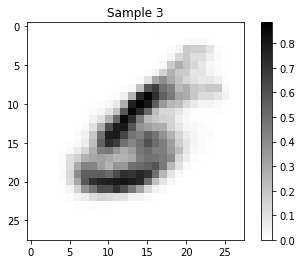





Sample 4
[[1.46896748e-11 6.50002968e-12 1.06806786e-11 4.32222964e-12
  1.24650143e-11 1.10141523e-11 3.18965796e-12 1.06790089e-11
  6.80242928e-12 5.55671698e-12 1.35336404e-11 7.23318324e-12
  8.24541217e-12 2.74739631e-09 7.45181278e-11 3.74706906e-12
  5.70889169e-12 5.94941197e-12 3.78501007e-12 4.90556250e-12
  4.27436819e-12 9.49399587e-12 1.05735958e-11 5.36883125e-12
  9.68178402e-12 4.66571400e-12 6.74767707e-12 1.00169152e-11]
 [9.01564066e-12 2.99144368e-12 6.38461376e-12 3.51570465e-12
  4.52521094e-12 6.17577517e-12 1.46747716e-08 3.09727710e-08
  3.13258653e-07 4.11118390e-06 9.62788320e-08 1.35029310e-07
  6.43055458e-08 9.79775976e-08 8.10597527e-08 8.13675385e-08
  1.68683329e-07 6.14591670e-07 6.47866685e-08 8.46613233e-08
  1.29676721e-07 2.93245979e-08 2.87498292e-09 2.60193798e-12
  1.06315946e-11 5.52594992e-12 6.02220617e-12 5.92453300e-12]
 [6.80328580e-12 4.34507638e-12 9.15543336e-12 7.13834113e-12
  1.38595496e-07 2.92704510e-08 4.91822959e-07 8.391742

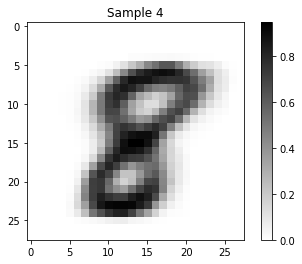





Sample 5
[[5.62886462e-14 1.91728466e-14 3.42663689e-14 1.79148112e-14
  7.66715657e-14 1.61626016e-13 3.65922977e-15 2.68911599e-14
  3.86307417e-15 2.44600224e-15 8.35959381e-14 7.59904682e-15
  2.21935888e-15 9.06604861e-11 1.37997253e-11 2.01861504e-15
  1.26497234e-15 7.14414269e-16 9.99150239e-15 7.72669723e-15
  1.17640616e-15 1.46232310e-14 1.67420975e-14 7.88131335e-16
  5.53691377e-15 5.52242188e-15 3.11980848e-15 1.02120935e-13]
 [9.84696045e-15 3.02529887e-15 2.48575371e-15 3.22854604e-14
  2.93766146e-15 8.24101309e-15 3.30720284e-10 6.81958434e-10
  4.91259300e-09 1.38905882e-08 7.49811047e-10 2.80879076e-09
  5.08565883e-08 2.52524785e-07 4.76323481e-10 1.11176046e-09
  2.70054912e-09 6.38686104e-10 1.60686386e-09 1.74611742e-10
  1.81954715e-10 4.64727805e-11 1.42750829e-11 3.70959985e-16
  1.68732470e-14 1.45617771e-14 2.33639808e-14 4.19276777e-15]
 [2.65587011e-15 3.62232835e-15 1.71230827e-14 2.91286364e-13
  2.18125865e-10 3.02999396e-11 7.80691956e-10 6.056371

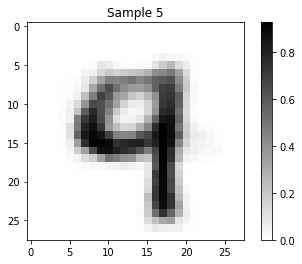

In [20]:
calculate_first_part_of_Q2(5)

In [ ]:
# Second Part of Question
'''
in this part, we are going to compute 
P(x_1, ... , x_n | Z_1 = z_1, Z_2 = z_2) * P(Z_1 = z_1) * P(Z_2 = z_2)
for different values of z_1 and z_2
Then show these data in a large grid plot with Z_1 and Z_2 axes
'''

In [22]:
def plot_the_answer_second_part(data):
  '''
  this part plots the data
  with z_1 and z_2 axes
  '''
  pixel_plot = plt.figure()
  pixel_plot.add_axes()
  
  plt.title("z_1 and z_2")
  pixel_plot = plt.imshow(data, cmap='binary', interpolation='nearest')
  plt.colorbar(pixel_plot)
  plt.ylabel('z_1')
  plt.xlabel('z_2')
  plt.xticks(np.arange(0, 28 * 25, 28), [(i - 12) * 0.25 for i in range(25)])
  plt.yticks(np.arange(0, 28 * 25, 28), [(i - 12) * 0.25 for i in range(25)])
  plt.grid('True')
  plt.show(pixel_plot)
    

def calculate_first_part_of_Q2():
  '''
  this part calculates and shows the proper plot for second part of question 2
  '''
  plt.rcParams["figure.figsize"] = 15, 15
  final_answer = np.zeros((25 * 28, 25 * 28))
  for z1_counter in range(n_disc_z):
    for z2_counter in range(n_disc_z):
      z_1 = disc_z1[z1_counter]
      z_2 = disc_z2[z2_counter]
      data = (get_p_x_cond_z1_z2(z_1, z_2)).reshape(28, 28)
      final_answer[z1_counter * 28:(z1_counter + 1) * 28,
                   z2_counter * 28:(z2_counter + 1) * 28] = data
      
  plot_the_answer_second_part(final_answer)


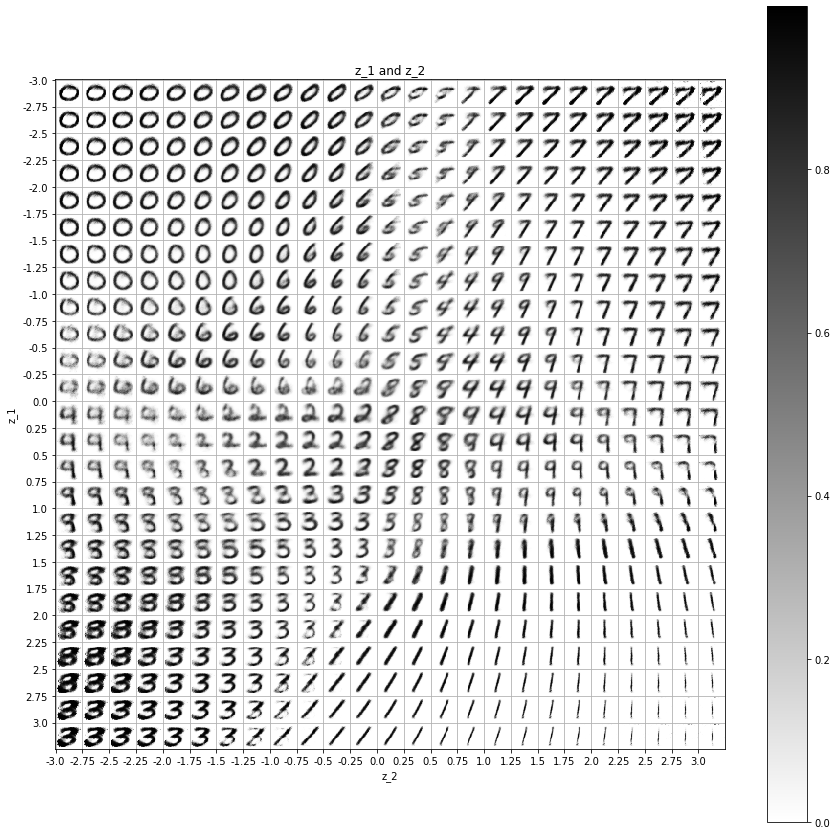

In [23]:
calculate_first_part_of_Q2()
